In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
class Net():
    
    def __init__(self):
        self.layers = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def forward(self, X):
        A = X
        for layer in self.layers:
            A = layer.forward(A)
        return A

    def compute_cost(self, A, Y):
        loss = - (np.log(A) * Y + np.log(1 - A) * (1 - Y))
        cost = np.sum(loss, axis=1, keepdims=True) / m
        cost = np.round(np.squeeze(cost), 3)
        return cost
    
    def crossentropy(self, preds, labels):
        # preds: probabilities in a (nclasses, nexamples) array
        # labels: 1-0 in a (nclasses, nexamples) array (one-hot encoded)
        cross = np.multiply(preds, labels)
        cross = cross[cross != 0]
        cross = -np.log(cross)
        cross = np.mean(cross)
        return cross
    
    def backward_pass(self, dERROR, learning_rate):
        for layer in reversed(self.layers):
            dERROR = layer.backward(dERROR, learning_rate)

    def backward_pass2(self, dERROR, learning_rate):
        mylist = self.layers[0:-1]
        inv_list = reversed(mylist)
        for layer in inv_list:
            dERROR = layer.backward(dERROR, learning_rate)

            
    def get_accuracy(self, A, Y):
        preds = np.round(A, decimals=0)
        
        results = (Y == preds)
        results = np.squeeze(np.sum(results, axis = 1, keepdims=True))
        
        rate = results / m
        return round(rate, 3)

    def train(self, X, Y, learning_rate, epochs):
        for e in range(epochs):
            A = self.forward(X)
            dERROR = - (Y/A) + ((1-Y)/(1-A))
            if e % 500 == 0:
                #rate = self.get_accuracy(A,Y)
                print("Epoch:", e, "Cost: ", self.compute_cost(A, Y)) #"Acc:", rate
            self.backward_pass(dERROR, learning_rate)
        
    def multiclass_train(self, X, Y, learning_rate, epochs):
        self.entrop = []
        for e in range(epochs):
            A = self.forward(X)
            dERROR = A - Y # at this point dERROR = dJ/dZ
            
            crossentrop = self.crossentropy(A, Y)            
            if e % 200 == 0:
                print("Epoch:", e, "Cost: ", crossentrop)
            self.entrop.append(crossentrop)
            
            self.backward_pass2(dERROR, learning_rate)
        
        plt.plot(self.entrop)
        
    def translate(self, A):
        return np.argmax(A, axis = 0)

In [65]:
class LayerFC():
    
    def __init__(self, n_x, n_h):
        self.W = np.random.randn(n_h, n_x)
        self.b = np.zeros((n_h, 1))
    
    def forward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        return self.Z
    
    def backward(self, dERROR, learning_rate):
        dW = (1 / m) * np.dot(dERROR, self.A_prev.T)
        db = (1 / m) * np.sum(dERROR, axis=1, keepdims=True)
        dERROR = np.dot(self.W.T, dERROR)
        
        self.W = self.W - learning_rate * dW        
        self.b = self.b - learning_rate * db        
        
        return dERROR
    
class LayerSigmoid():
    
    def forward(self, Z):
        self.A = 1 / (1 + np.exp(-Z))
        return self.A
    
    def backward(self, dERROR, learning_rate):
        derivative = self.A * (1 - self.A)
        dERROR = dERROR * derivative        
        return dERROR

class LayerTanh():
    
    def forward(self, Z):
        self.A = np.tanh(Z)
        return self.A
    
    def backward(self, dERROR, learning_rate):
        derivative = 1 - np.square(self.A)
        dERROR = dERROR * derivative
        return dERROR

class LayerSoftmax():
    
    def forward(self, Z):
        self.t = np.exp(Z)
        exps_sum = np.sum(self.t)
        self.A = self.t / exps_sum
        return self.A

In [66]:
n_x = 2
m = 220
X = np.random.randn(n_x, m)

mask1 = X[0, :] > 0
mask2 = X[1, :] > 0

Y = np.logical_xor(mask1, mask2)
Y = Y.reshape(1, m)

X.shape, Y.shape

((2, 220), (1, 220))

In [67]:
input_dim= 2
m1 = 50 # nbr of examples

X_train = np.random.randn(input_dim, m1)

mask1 = X_train[0, :] > 0
mask2 = X_train[1, :] > 0

Y_train = np.logical_xor(mask1, mask2)
Y_train = Y_train.reshape(1, m1)
#X_train.shape, Y_train.shape

### Passage à Softmax

In [90]:
X = np.array([[1,0,0],[0,1,0],[1,0,0],[0,0,1],[1,1,1],[1,1,1]]).T
Y = np.array([[1,0,0,0],[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1],[0,0,0,1]]).T
Y.shape

(4, 6)

In [91]:
net2 = Net()
net2.add(LayerFC(X.shape[0],2))
net2.add(LayerTanh())
net2.add(LayerFC(2, 4))
net2.add(LayerTanh())
net2.add(LayerFC(4, 4))
net2.add(LayerSoftmax())

In [92]:
abc = net2.forward(X)

In [93]:
print(abc)

[[0.05296145 0.03633977 0.05296145 0.03272321 0.0527722  0.0527722 ]
 [0.02414151 0.0376679  0.02414151 0.04852155 0.02624335 0.02624335]
 [0.01126921 0.04276822 0.01126921 0.06089073 0.01291752 0.01291752]
 [0.08218558 0.03489716 0.08218558 0.02883305 0.07618837 0.07618837]]


In [94]:
net2.translate(abc)

array([3, 2, 3, 2, 3, 3])

Epoch: 0 Cost:  2.8505160042522193
Epoch: 200 Cost:  2.664097897186537
Epoch: 400 Cost:  2.634051084822692
Epoch: 600 Cost:  2.6417075136791444
Epoch: 800 Cost:  2.6552398255960203
Epoch: 1000 Cost:  2.667283714678561
Epoch: 1200 Cost:  2.677613720236668
Epoch: 1400 Cost:  2.687907511427216


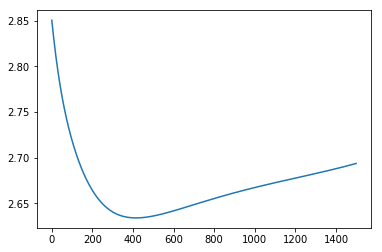

In [95]:
net2.multiclass_train(X, Y, epochs=1500, learning_rate=0.09)

In [96]:
abc2 = net2.forward(X)
net2.translate(abc2)

array([0, 1, 0, 1, 0, 0])